<a href="https://colab.research.google.com/github/MouadGhouti/CS313_Project/blob/main/CS313_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Importing necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#loading the data set into a data frame and extracting information from the data frame
df = pd.read_csv('online_shoppers_intention.csv')

# Exploratory Data Analysis (EDA)


In [59]:
#Prining the Dataset
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
#Printing general statistics about the dataset
df.describe()

In [ ]:
#check for null values
df.isnull().sum()

In [6]:
#Check the ratio between purchased and not purchased
print(f"Percentage of people who did not purchase {round(df['Revenue'].value_counts()[0]/len(df) * 100 , 2)}%")
print(f"Percentage of people who purchased {round(df['Revenue'].value_counts()[1]/len(df) * 100 , 2)}%")


Percentage of people who did not purchase 84.53%
Percentage of people who purchased 15.47%


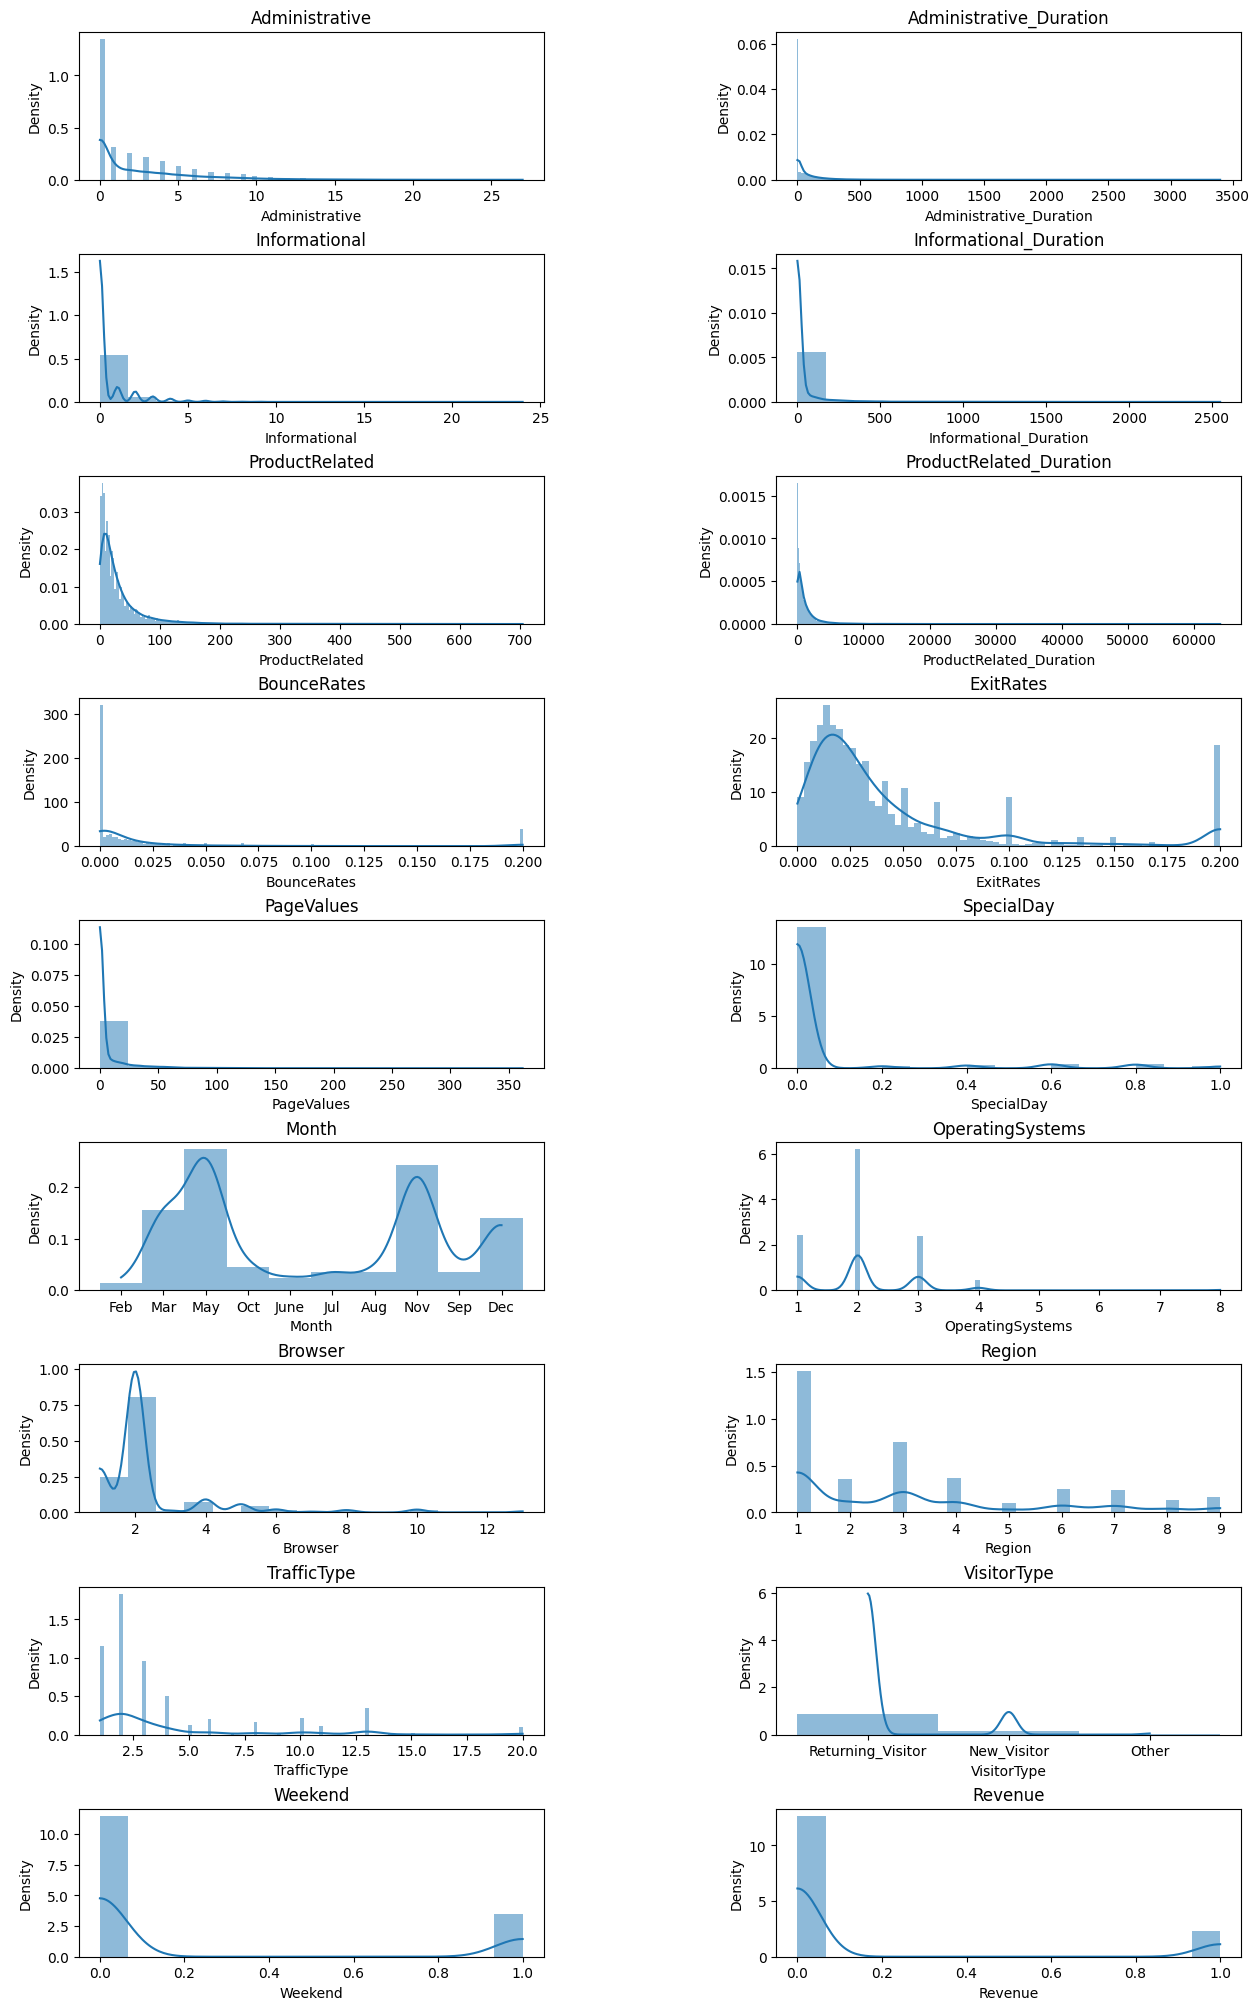

In [7]:
#@title Create features distribution plots
columns_to_plot = df.columns.tolist()
col_num = 2
row_num = 9
fig, axes = plt.subplots(row_num, col_num, figsize=(15, 25))
for i, col in enumerate(columns_to_plot):
    row = i // col_num #example if we are at the 6th feature row = 6/2 = 3
    col_n = i % col_num #example if we are at the 6th feature row = 6%2 = 0
    sns.histplot(df[col],  kde=True, stat="density", linewidth=0, ax=axes[row, col_n])
    axes[row, col_n].set_title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [8]:
# #print plots
# columns_to_plot = df.columns.tolist()
# for i, col in enumerate(columns_to_plot):
#     plt.figure(figsize=(8, 6))  # Set the size of each figure
#     sns.histplot(df[col], kde=True, stat="density", linewidth=0)
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.grid(True)
#     plt.tight_layout()
#     # Save each plot with a unique filename
#     plt.savefig(f'plot_{col}.png', dpi=300)
#     plt.close()

In [8]:
#@title encoding and normalizing
#Encode the 'VisitorType' column
label_encoder = LabelEncoder()
df['VisitorType_LabelEncoded'] = label_encoder.fit_transform(df['VisitorType'])
#Encode  the 'Revenue' column
df['Revenue_LabelEncoded'] = label_encoder.fit_transform(df['Revenue'])
#Encode  the 'Month' column
df['Month_LabelEncoded']  = label_encoder.fit_transform(df['Month'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorType_LabelEncoded,Revenue_LabelEncoded,Month_LabelEncoded
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,2,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,2,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,2,0,2


In [9]:
#@title Creating feature and target vectors
features = df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration', 'VisitorType_LabelEncoded','Month_LabelEncoded','BounceRates','ExitRates']]
target = df[['Revenue_LabelEncoded']]
data = pd.concat([features , target],axis=1)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,VisitorType_LabelEncoded,Month_LabelEncoded,BounceRates,ExitRates,Revenue_LabelEncoded
0,0,0.0,0,0.0,1,0.000000,2,2,0.200000,0.200000,0
1,0,0.0,0,0.0,2,64.000000,2,2,0.000000,0.100000,0
2,0,0.0,0,0.0,1,0.000000,2,2,0.200000,0.200000,0
3,0,0.0,0,0.0,2,2.666667,2,2,0.050000,0.140000,0
4,0,0.0,0,0.0,10,627.500000,2,2,0.020000,0.050000,0
...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,2,1,0.007143,0.029031,0
12326,0,0.0,0,0.0,5,465.750000,2,7,0.000000,0.021333,0
12327,0,0.0,0,0.0,6,184.250000,2,7,0.083333,0.086667,0
12328,4,75.0,0,0.0,15,346.000000,2,7,0.000000,0.021053,0


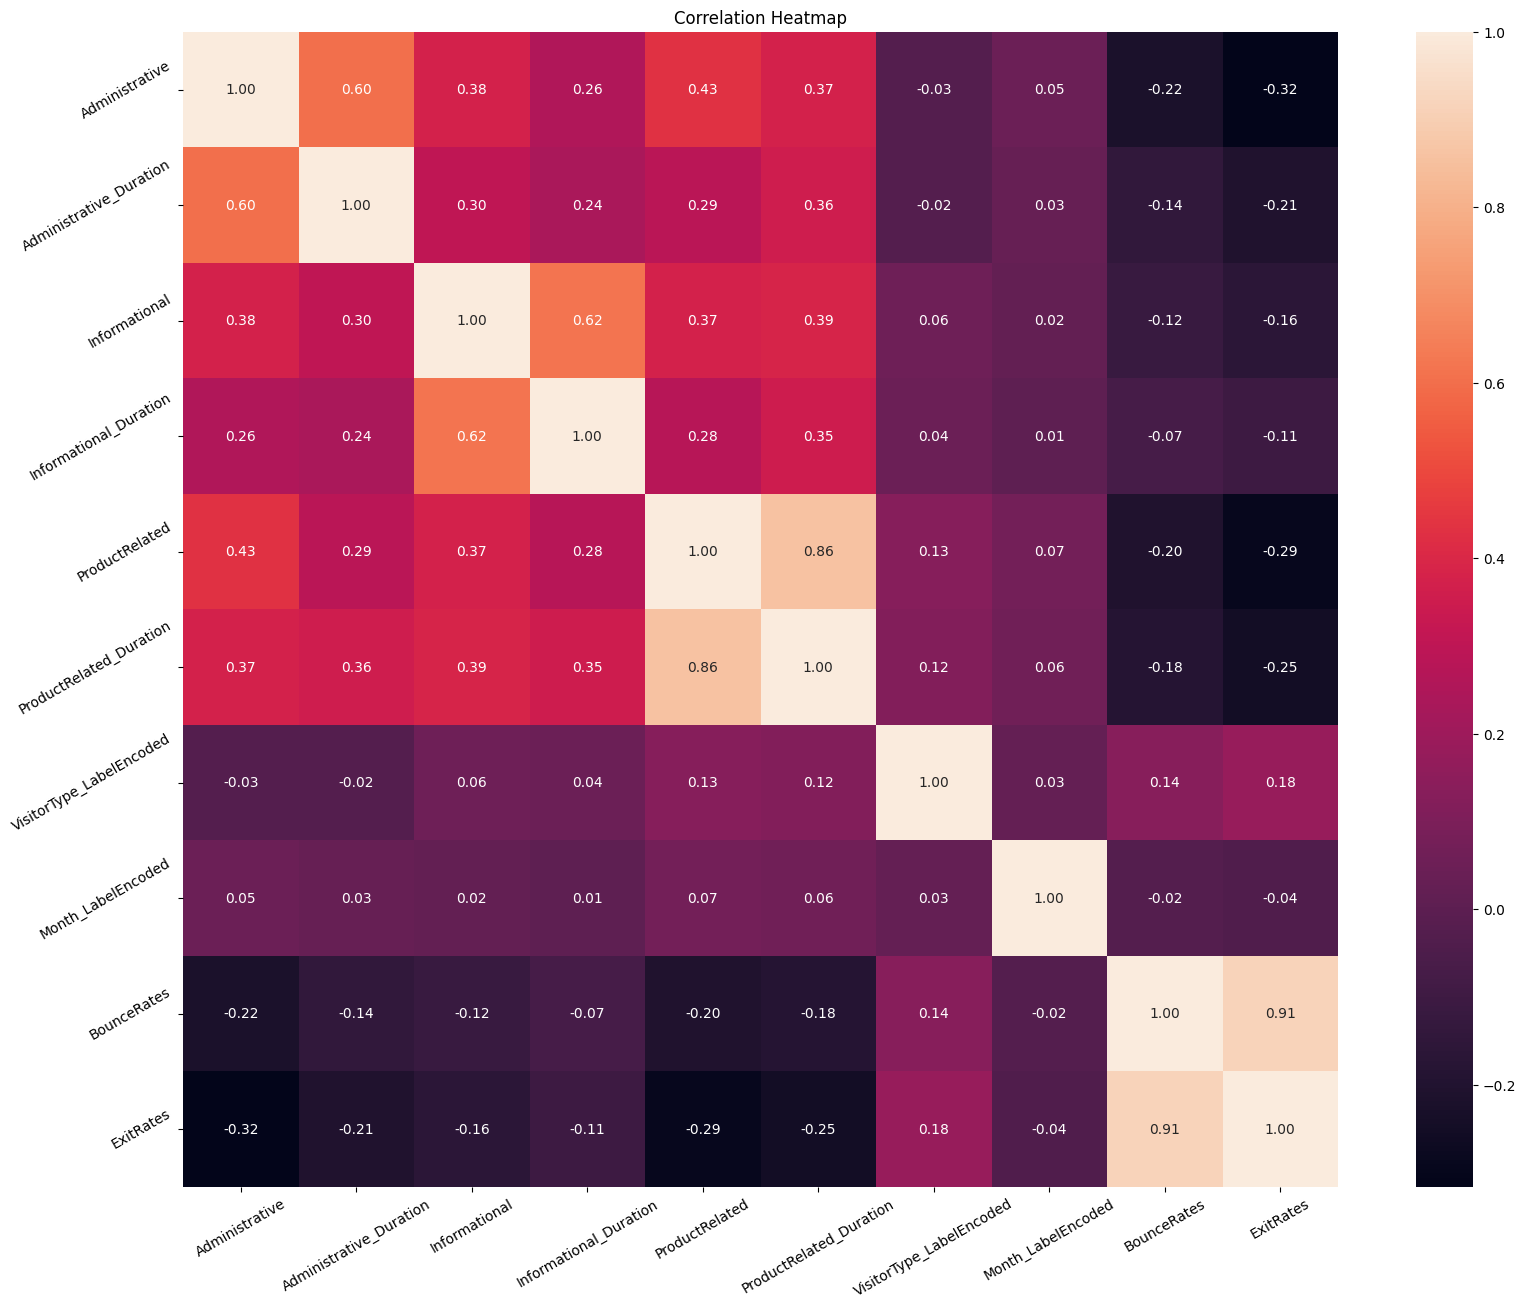

In [11]:
corr_matrix_full = features.corr()
# Create correlation heatmap
plt.figure(figsize=(20,15))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix_full, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [10]:
#Drop ExitRates because of the high correlation with Bounce Rates (redundancy)
features.drop(columns=['ExitRates'], inplace=True)
features.columns

<ipython-input-10-f5bdc84a26cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns=['ExitRates'], inplace=True)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'VisitorType_LabelEncoded', 'Month_LabelEncoded', 'BounceRates'],
      dtype='object')

# Predictive Analytics

In [30]:
#Spliting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2)
# Display the shapes of the train and test sets
print('Train features shape:' ,X_train.shape)
print('Test features shape:' ,X_test.shape)
print('Train target shape:' ,y_train.shape)
print('Test target shape:' ,y_test.shape)

#Check if the distribution changed after splitting
print(f"Percentage of people who did not purchase in the training dataset {round(y_train.value_counts()[0]/len(y_train) * 100 , 2)}%")
print(f"Percentage of people who  purchased in the training dataset {round(y_train.value_counts()[1]/len(y_train) * 100 , 2)} %")


Train features shape: (9864, 9)
Test features shape: (2466, 9)
Train target shape: (9864, 1)
Test target shape: (2466, 1)
Percentage of people who did not purchase in the training dataset 84.21%
Percentage of people who  purchased in the training dataset 15.79 %


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)  # Scale the test set in the same way as the training set
y_train= y_train.to_numpy().ravel()
# Define the Logistic Regression model with verbose output during training
model_lbfgs = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=200,verbose=1)
model_lbfgs.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, verbose=1)

In [15]:
# Define the Stochastic Gradient Descent model with verbose output during training
model_SGD = SGDClassifier(loss='log_loss', penalty='l2', max_iter=200, verbose=1)
model_SGD.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 8.33, NNZs: 9, Bias: -4.032221, T: 9864, Avg. loss: 3.693318
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.93, NNZs: 9, Bias: -3.388881, T: 19728, Avg. loss: 1.054116
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.99, NNZs: 9, Bias: -3.217167, T: 29592, Avg. loss: 0.748428
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.61, NNZs: 9, Bias: -2.757565, T: 39456, Avg. loss: 0.664631
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.44, NNZs: 9, Bias: -2.727453, T: 49320, Avg. loss: 0.555079
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.63, NNZs: 9, Bias: -2.573530, T: 59184, Avg. loss: 0.528346
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.61, NNZs: 9, Bias: -2.655600, T: 69048, Avg. loss: 0.503262
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 1.99, NNZs: 9, Bias: -1.903338, T: 78912, Avg. loss: 0.484229
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 1.68, NNZs: 9, Bias: -2.369747, T: 88776, Avg. loss: 0.471767
Total trai

SGDClassifier(loss='log_loss', max_iter=200, verbose=1)

In [13]:
#@title functions to compare between models
#Create a function to generate a report
import random
#This method doesn't work since our target label is 0 (didn't purchase)
def generate_report_pos_label1(y_true, y_pred):
    metrics = {}
    metrics['accuracy'] = round(accuracy_score(y_true, y_pred),2)
    metrics['precision'] = round(precision_score(y_true, y_pred),2)
    metrics['recall'] = round(recall_score(y_true, y_pred),2)
    metrics['f1'] = round(f1_score(y_true, y_pred,average='binary'),2)
    metrics['AUC-ROC'] = round(roc_auc_score(y_true, y_pred),2)
    metrics['Precision-recall']=round(average_precision_score(y_true, y_pred),2)
    return metrics

#this is the correct modification
def generate_report(y_true, y_pred):
    metrics = {}
    metrics['accuracy'] = round(accuracy_score(y_true, y_pred),2)
    metrics['precision'] = round(precision_score(y_true, y_pred, pos_label=0),2)
    metrics['recall'] = round(recall_score(y_true, y_pred, pos_label=0),2)
    metrics['f1'] = round(f1_score(y_true, y_pred,average='binary', pos_label=0),2)
    metrics['AUC-ROC'] = round(roc_auc_score(y_true, y_pred),2)
    metrics['Precision-recall']=round(average_precision_score(y_true, y_pred),2)
    return metrics
#Create a function to genereate a confusion materix heatmap
def cmatrix(y_true,y_pred,model):
  # Calculate the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  # Plot the confusion matrix
  random_colormap = random.choice(['Purples','Blues','Greens','Reds'])
  sns.heatmap(cm, annot=True, xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=random_colormap,fmt='g')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'{model} Confusion Matrix')
  plt.show()


In [31]:
y_hat_lbfgs = model_lbfgs.predict(X_test_scaled)
y_hat_SGD = model_SGD.predict(X_test_scaled)

lbfgs_report = generate_report_pos_label1(y_test,y_hat_lbfgs)
SGD_report = generate_report_pos_label1(y_test,y_hat_SGD)
print('lbfgs_report:', lbfgs_report)
print('SGD_report',SGD_report)
#This gives very poor resaults because the positive label is consedered 1 w

lbfgs_report: {'accuracy': 0.74, 'precision': 0.12, 'recall': 0.13, 'f1': 0.13, 'AUC-ROC': 0.49, 'Precision-recall': 0.14}
SGD_report {'accuracy': 0.82, 'precision': 0.08, 'recall': 0.02, 'f1': 0.04, 'AUC-ROC': 0.49, 'Precision-recall': 0.14}


In [18]:
y_hat_lbfgs = model_lbfgs.predict(X_test_scaled)
y_hat_SGD = model_SGD.predict(X_test_scaled)

lbfgs_report = generate_report(y_test,y_hat_lbfgs)
SGD_report = generate_report(y_test,y_hat_SGD)
print('lbfgs_report:', lbfgs_report)
print('SGD_report',SGD_report)
#Much better resaults when consedering the positive label to be 0

lbfgs_report: {'accuracy': 0.85, 'precision': 0.85, 'recall': 1.0, 'f1': 0.92, 'AUC-ROC': 0.51}
SGD_report {'accuracy': 0.84, 'precision': 0.85, 'recall': 0.99, 'f1': 0.91, 'AUC-ROC': 0.51}


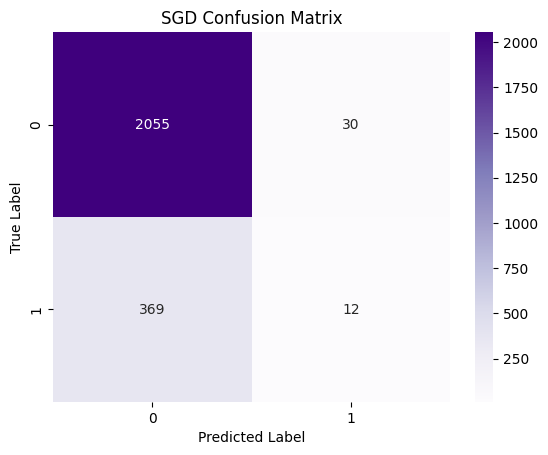

In [19]:
cmatrix(y_test,y_hat_SGD,'SGD')

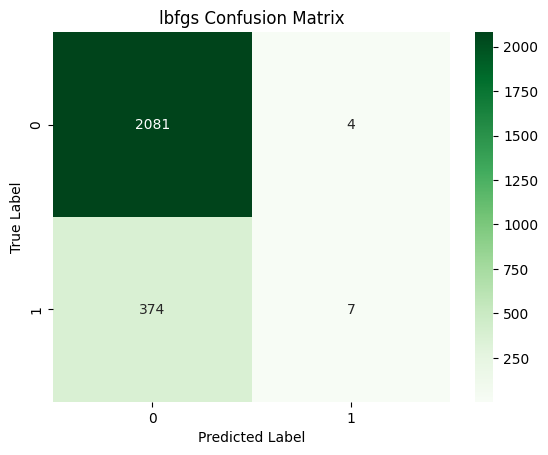

In [20]:
cmatrix(y_test,y_hat_lbfgs, 'lbfgs')

In [14]:
#@title Exploring different models

#importing lazypredict for convenient comparison between different models
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [22]:
from sklearn.metrics import average_precision_score
#compareing the models using average precision score
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=average_precision_score)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [00:45<00:02,  2.32s/it]

[LightGBM] [Info] Number of positive: 1527, number of negative: 8337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154805 -> initscore=-1.697398
[LightGBM] [Info] Start training from score -1.697398


100%|██████████| 29/29 [00:46<00:00,  1.60s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.69               0.61     0.61      0.73   
QuadraticDiscriminantAnalysis      0.73               0.59     0.59      0.75   
PassiveAggressiveClassifier        0.75               0.59     0.59      0.76   
GaussianNB                         0.76               0.57     0.57      0.77   
BernoulliNB                        0.79               0.57     0.57      0.78   
DecisionTreeClassifier             0.75               0.57     0.57      0.76   
Perceptron                         0.76               0.56     0.56      0.77   
ExtraTreeClassifier                0.75               0.56     0.56      0.76   
XGBClassifier                      0.82               0.56     0.56      0.80   
LabelPropagation                   0.81               0.55     0.55      0.79   
LabelSpreading              

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2118
           1       0.45      0.11      0.18       348

    accuracy                           0.86      2466
   macro avg       0.66      0.55      0.55      2466
weighted avg       0.81      0.86      0.82      2466



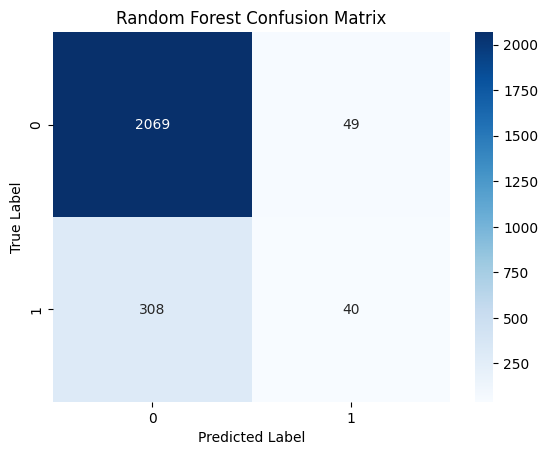

In [16]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
cmatrix(y_test,y_pred_rf, 'Random Forest')

In [18]:
#get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance)

                    Feature  Importance
5   ProductRelated_Duration        0.28
4            ProductRelated        0.18
1   Administrative_Duration        0.14
8               BounceRates        0.12
7        Month_LabelEncoded        0.09
0            Administrative        0.08
3    Informational_Duration        0.06
2             Informational        0.03
6  VisitorType_LabelEncoded        0.03


# Upsampling using Synthetic Minority Over-sampling TEchnique (SMOTE)

In [33]:
from imblearn.over_sampling import SMOTE
#resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

#Check the percentages
print(f"Percentage of people who did not purchase in the training dataset {round((np.sum(y_resampled == 0)/len(y_resampled)) * 100 , 2)}%")
print(f"Percentage of people who  purchased in the training dataset {round((np.sum(y_resampled == 1)/len(y_resampled)) * 100 , 2)} %")
#50-50 split

Percentage of people who did not purchase in the training dataset Revenue_LabelEncoded   50.00
dtype: float64%
Percentage of people who  purchased in the training dataset Revenue_LabelEncoded   50.00
dtype: float64 %


In [34]:
# Define the Logistic Regression model
model_lbfgs = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=200,verbose=1)
model_lbfgs.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=200, verbose=1)

In [35]:
# Define the Stochastic Gradient Descent model with verbose output during training
model_SGD = SGDClassifier(loss='log_loss', penalty='l2', max_iter=200, verbose=1)
model_SGD.fit(X_resampled, y_resampled)

-- Epoch 1
Norm: 3.88, NNZs: 9, Bias: 0.704462, T: 16612, Avg. loss: 4.452438
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 9, Bias: -0.282506, T: 33224, Avg. loss: 1.264051
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 9, Bias: -0.187233, T: 49836, Avg. loss: 0.991533
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 9, Bias: 0.181532, T: 66448, Avg. loss: 0.878145
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 9, Bias: -0.456239, T: 83060, Avg. loss: 0.825775
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 9, Bias: -0.559310, T: 99672, Avg. loss: 0.807900
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 0.71, NNZs: 9, Bias: -0.102530, T: 116284, Avg. loss: 0.784938
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.98, NNZs: 9, Bias: 0.458219, T: 132896, Avg. loss: 0.764429
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 0.84, NNZs: 9, Bias: 0.005108, T: 149508, Avg. loss: 0.760893
Total trai

SGDClassifier(loss='log_loss', max_iter=200, verbose=1)

In [36]:
#lets try the SGD and linear regression with the new dataset
y_hat_lbfgs = model_lbfgs.predict(X_test_scaled)
y_hat_SGD = model_SGD.predict(X_test_scaled)

lbfgs_report = generate_report_pos_label1(y_test,y_hat_lbfgs)
SGD_report = generate_report_pos_label1(y_test,y_hat_SGD)
print(classification_report(y_test,y_hat_lbfgs))
print('lbfgs_report',lbfgs_report)
print('SGD_report',SGD_report)

              precision    recall  f1-score   support

           0       0.86      0.41      0.56      2116
           1       0.14      0.59      0.23       350

    accuracy                           0.44      2466
   macro avg       0.50      0.50      0.39      2466
weighted avg       0.76      0.44      0.51      2466

lbfgs_report {'accuracy': 0.44, 'precision': 0.14, 'recall': 0.59, 'f1': 0.23, 'AUC-ROC': 0.5, 'Precision-recall': 0.14}
SGD_report {'accuracy': 0.45, 'precision': 0.14, 'recall': 0.54, 'f1': 0.22, 'AUC-ROC': 0.49, 'Precision-recall': 0.14}


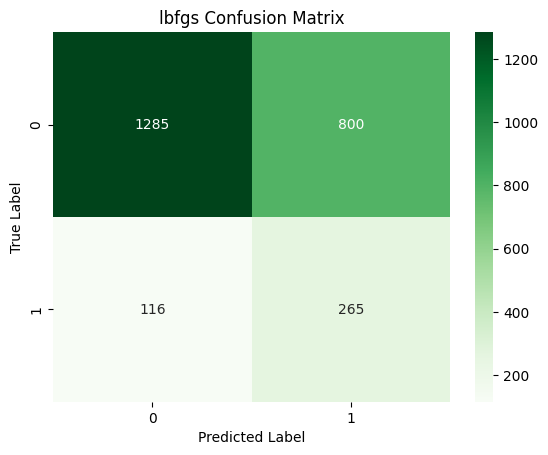

In [30]:
cmatrix(y_test,y_hat_lbfgs, 'lbfgs')

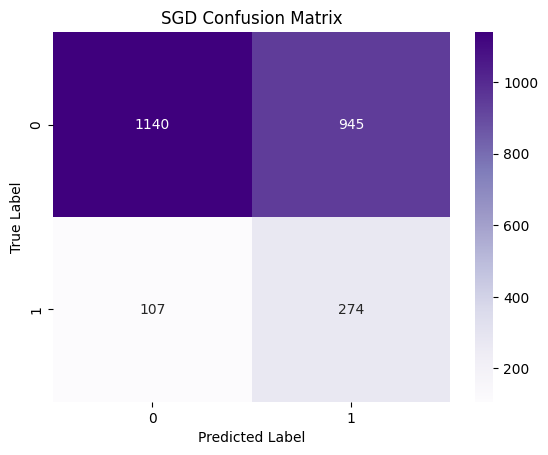

In [31]:
cmatrix(y_test,y_hat_SGD, 'SGD')

not quite the desired output... lets try different models and see if they might improve or not

In [32]:
models3, predictions3 = clf.fit(X_resampled, X_test_scaled, y_resampled, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [01:54<00:03,  3.87s/it]

[LightGBM] [Info] Number of positive: 8337, number of negative: 8337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2062
[LightGBM] [Info] Number of data points in the train set: 16674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [01:55<00:00,  3.97s/it]


In [33]:
print(models3)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.63               0.68     0.68      0.68   
GaussianNB                         0.61               0.67     0.67      0.66   
LinearSVC                          0.64               0.66     0.66      0.69   
CalibratedClassifierCV             0.65               0.66     0.66      0.70   
LogisticRegression                 0.63               0.66     0.66      0.68   
RidgeClassifierCV                  0.66               0.65     0.65      0.70   
RidgeClassifier                    0.66               0.65     0.65      0.70   
LinearDiscriminantAnalysis         0.66               0.65     0.65      0.70   
SGDClassifier                      0.57               0.64     0.64      0.63   
NuSVC                              0.66               0.63     0.63      0.70   
NearestCentroid             

Its still sub optimal, lets try undersampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(features, target)
print(f"Percentage of people who did not purchase in the training dataset {round((y_resampled.value_counts()[0]/len(y_resampled)) * 100 , 2)}%")
print(f"Percentage of people who  purchased in the training dataset {round((y_resampled.value_counts()[1]/len(y_resampled)) * 100 , 2)} %")
print('Total number of resampled data:', len(y_resampled))

Percentage of people who did not purchase in the training dataset 50.0%
Percentage of people who  purchased in the training dataset 50.0 %
Total number of resampled data: 3816


In [20]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_resampled ,y_resampled,test_size = 0.3,random_state = 0)

In [25]:
model_lbfgs.fit(X_train_undersample, y_train_undersample)
model_SGD.fit(X_train_undersample, y_train_undersample)

-- Epoch 1
Norm: 5193.57, NNZs: 9, Bias: -1450.949238, T: 2671, Avg. loss: 6095645.288641
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6174.58, NNZs: 9, Bias: -2072.967542, T: 5342, Avg. loss: 2566342.405899
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9708.90, NNZs: 9, Bias: -2375.498007, T: 8013, Avg. loss: 1605948.222857
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 5503.66, NNZs: 9, Bias: -2618.741788, T: 10684, Avg. loss: 1152413.362370
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4830.59, NNZs: 9, Bias: -2756.734208, T: 13355, Avg. loss: 864956.546657
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4148.97, NNZs: 9, Bias: -2880.081058, T: 16026, Avg. loss: 668561.165868
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 4279.73, NNZs: 9, Bias: -2996.466634, T: 18697, Avg. loss: 589041.280040
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 3980.29, NNZs: 9, Bias: -3107.088150, T: 21368, Avg. loss: 602959.592451
Total training time: 0.01 seconds.

SGDClassifier(loss='log_loss', max_iter=200, verbose=1)

In [26]:
#lets try the SGD and linear regression with the undersampled dataset
y_hat_lbfgs = model_lbfgs.predict(X_test_undersample)
y_hat_SGD = model_SGD.predict(X_test_undersample)

lbfgs_report = generate_report(y_test_undersample,y_hat_lbfgs)
SGD_report = generate_report(y_test_undersample,y_hat_SGD)
print('lbfgs_report:', lbfgs_report)
print('SGD_report',SGD_report)

lbfgs_report: {'accuracy': 0.63, 'precision': 0.62, 'recall': 0.69, 'f1': 0.65, 'AUC-ROC': 0.63, 'Precision-recall': 0.57}
SGD_report {'accuracy': 0.54, 'precision': 0.84, 'recall': 0.12, 'f1': 0.21, 'AUC-ROC': 0.55, 'Precision-recall': 0.52}


In [28]:
# Get feature importance (coefficients)
feature_importances = np.abs(model_lbfgs.coef_[0])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                    Feature  Importance
6  VisitorType_LabelEncoded        0.48
7        Month_LabelEncoded        0.07
0            Administrative        0.06
8               BounceRates        0.02
2             Informational        0.01
4            ProductRelated        0.00
3    Informational_Duration        0.00
5   ProductRelated_Duration        0.00
1   Administrative_Duration        0.00


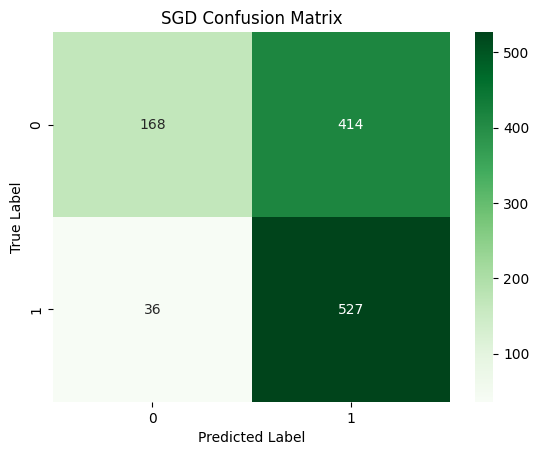

In [38]:
cmatrix(y_test_undersample,y_hat_SGD, 'SGD')

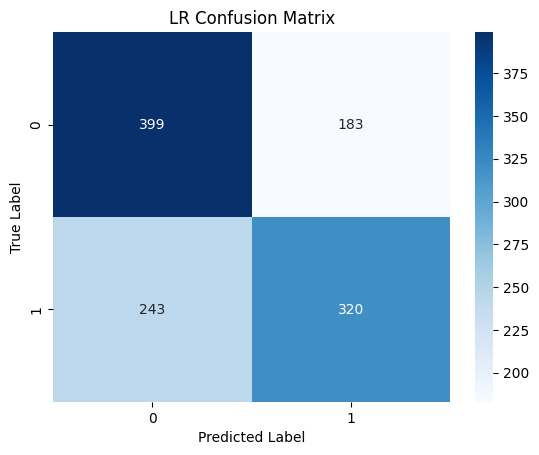

In [39]:
cmatrix(y_test_undersample,y_hat_lbfgs, 'LR')

###The logistic regression is showing promising results. Let's examine other models first.



In [40]:
models4, predictions4 = clf.fit(X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)
print(models4)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:08<00:00,  3.40it/s]

[LightGBM] [Info] Number of positive: 1345, number of negative: 1326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 2671, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503557 -> initscore=0.014227
[LightGBM] [Info] Start training from score 0.014227
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.69               0.69     0.69      0.69   
RandomForestClassifier             0.69               0.69     0.69      0.68   
LGBMClassifier                     0.68               0.68     0.68      0.67   
XGBClassifier                      0.68               0.68     0.68      0.67   
SVC                       

In [38]:
lr = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=200,verbose=1,C=0.1)#Set the inverse of regularization strength to 0.01 (best according to joparga3 on kaggel)
lr.fit(X_train_undersample, y_train_undersample)

LogisticRegression(C=0.1, max_iter=200, verbose=1)

lbfgs_report: {'accuracy': 0.63, 'precision': 0.62, 'recall': 0.69, 'f1': 0.65, 'AUC-ROC': 0.63, 'Precision-recall': 0.57}


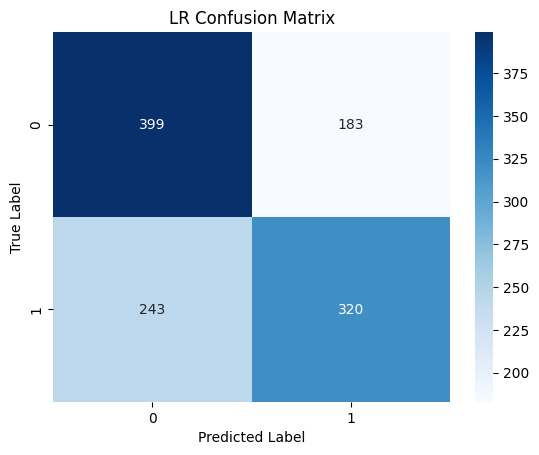

In [39]:
#testing the model on the undersampled dataset
y_hat_lr = lr.predict(X_test_undersample)
lr_report = generate_report(y_test_undersample,y_hat_lr)
print('lbfgs_report:', lr_report)
cmatrix(y_test_undersample,y_hat_lr, 'LR')

lr_report: {'accuracy': 0.68, 'precision': 0.91, 'recall': 0.7, 'f1': 0.79, 'AUC-ROC': 0.63, 'Precision-recall': 0.2}


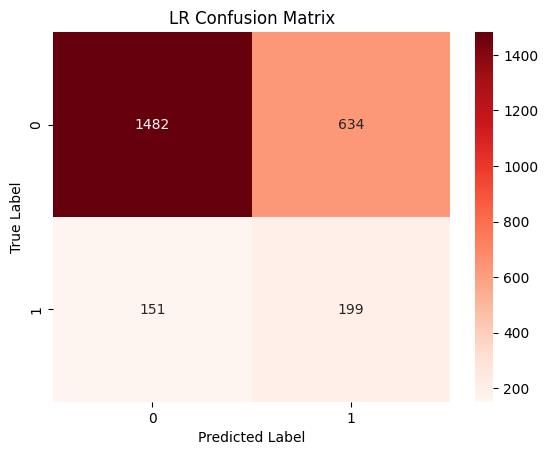

In [40]:
#test the model on the normal testing set
y_hat_lr = lr.predict(X_test)
lr_report = generate_report(y_test,y_hat_lr)
print('lr_report:', lr_report)
cmatrix(y_test,y_hat_lr, 'LR')